In [18]:
#importing data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

In [2]:
#loading datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df= pd.read_csv('/content/drive/MyDrive/Oasis_projects/menu.csv')
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [6]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('-', '_')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   category                     260 non-null    object 
 1   item                         260 non-null    object 
 2   serving_size                 260 non-null    object 
 3   calories                     260 non-null    int64  
 4   calories_from_fat            260 non-null    int64  
 5   total_fat                    260 non-null    float64
 6   total_fat_%_daily_value      260 non-null    int64  
 7   saturated_fat                260 non-null    float64
 8   saturated_fat_%_daily_value  260 non-null    int64  
 9   trans_fat                    260 non-null    float64
 10  cholesterol                  260 non-null    int64  
 11  cholesterol_%_daily_value    260 non-null    int64  
 12  sodium                       260 non-null    int64  
 13  sodium_%_daily_value

In [14]:
print("Missing Values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())

Missing Values:
 category                       0
item                           0
serving_size                   0
calories                       0
calories_from_fat              0
total_fat                      0
total_fat_%_daily_value        0
saturated_fat                  0
saturated_fat_%_daily_value    0
trans_fat                      0
cholesterol                    0
cholesterol_%_daily_value      0
sodium                         0
sodium_%_daily_value           0
carbohydrates                  0
carbohydrates_%_daily_value    0
dietary_fiber                  0
dietary_fiber_%_daily_value    0
sugars                         0
protein                        0
vitamin_a_%_daily_value        0
vitamin_c_%_daily_value        0
calcium_%_daily_value          0
iron_%_daily_value             0
dtype: int64

Duplicates: 0


In [15]:
df.describe()
df.mode().iloc[0]

,0
category,Coffee & Tea
item,1% Low Fat Milk Jug
serving_size,16 fl oz cup
calories,0.0
calories_from_fat,0.0
total_fat,0.0
total_fat_%_daily_value,0.0
saturated_fat,0.0
saturated_fat_%_daily_value,0.0
trans_fat,0.0


In [17]:
#top 10 items by calories
top_calories= df.sort_values('calories', ascending= False).head(10)
top_calories[['item','calories']]

#top 10 items by sodium
top_sodium= df.sort_values('sodium', ascending=False).head(10)
top_sodium[['item','sodium']]


,item,sodium
82,Chicken McNuggets (40 piece),3600
34,Big Breakfast with Hotcakes and Egg Whites (La...,2290
32,Big Breakfast with Hotcakes (Large Biscuit),2260
33,Big Breakfast with Hotcakes and Egg Whites (Re...,2170
31,Big Breakfast with Hotcakes (Regular Biscuit),2150
81,Chicken McNuggets (20 piece),1800
63,Bacon Clubhouse Crispy Chicken Sandwich,1720
30,Big Breakfast with Egg Whites (Large Biscuit),1700
28,Big Breakfast (Large Biscuit),1680
29,Big Breakfast with Egg Whites (Regular Biscuit),1590


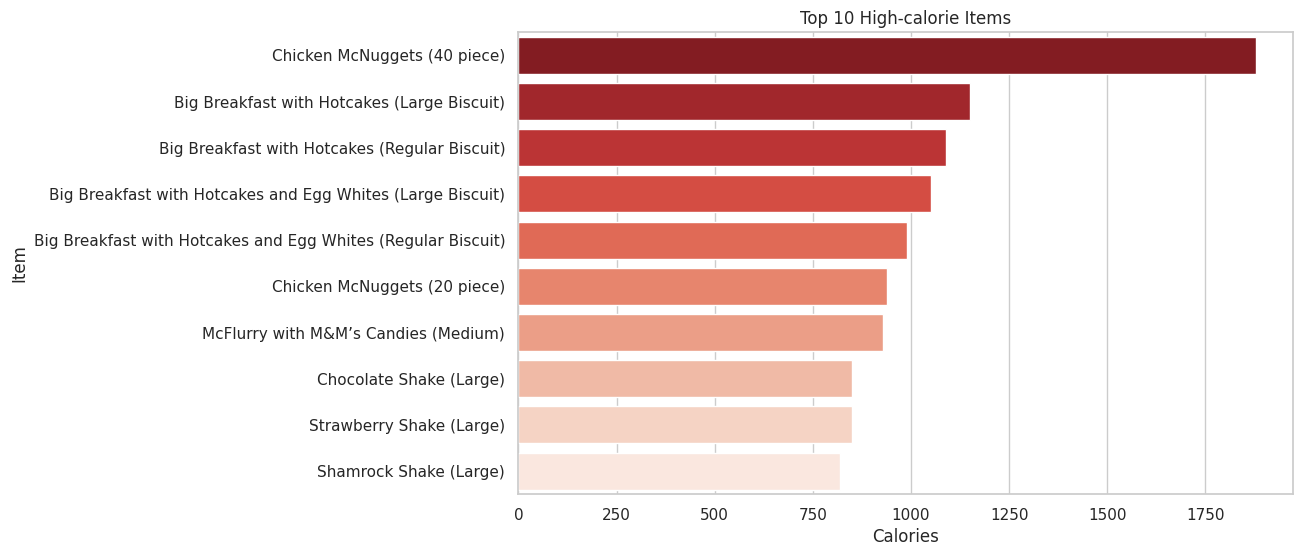

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(data= top_calories, x='calories', y='item', palette='Reds_r')
plt.title('Top 10 High-Calorie Items')
plt.xlabel('Calories')
plt.ylabel('Item')
plt.show()

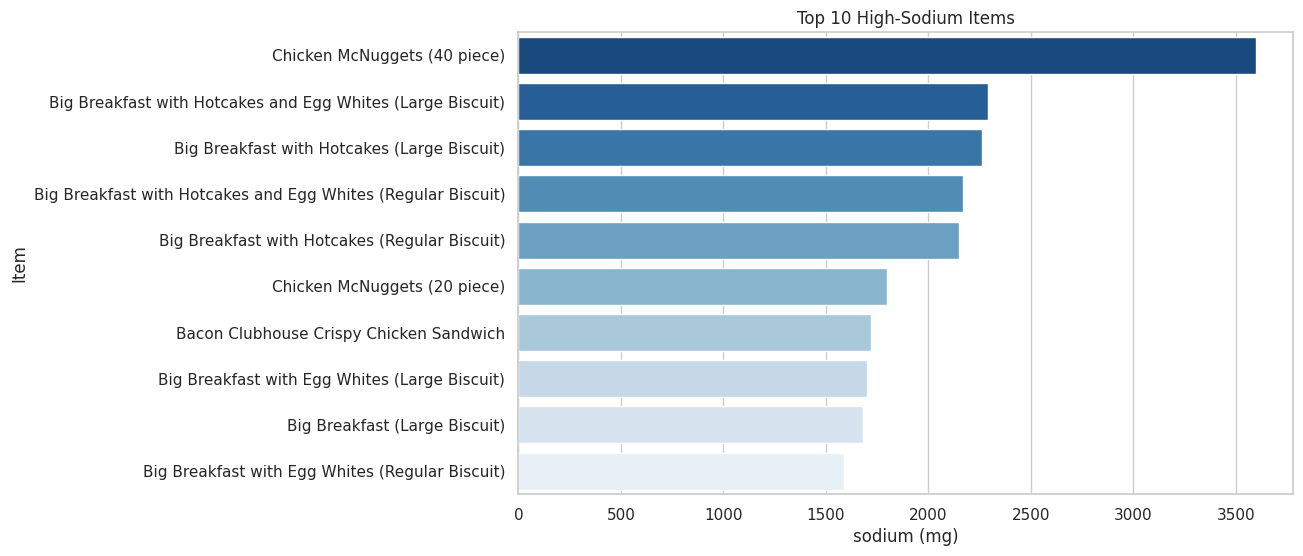

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_sodium, x='sodium', y='item', palette= 'Blues_r')
plt.title('Top 10 High-Sodium Items')
plt.xlabel('sodium (mg)')
plt.ylabel('Item')
plt.show()

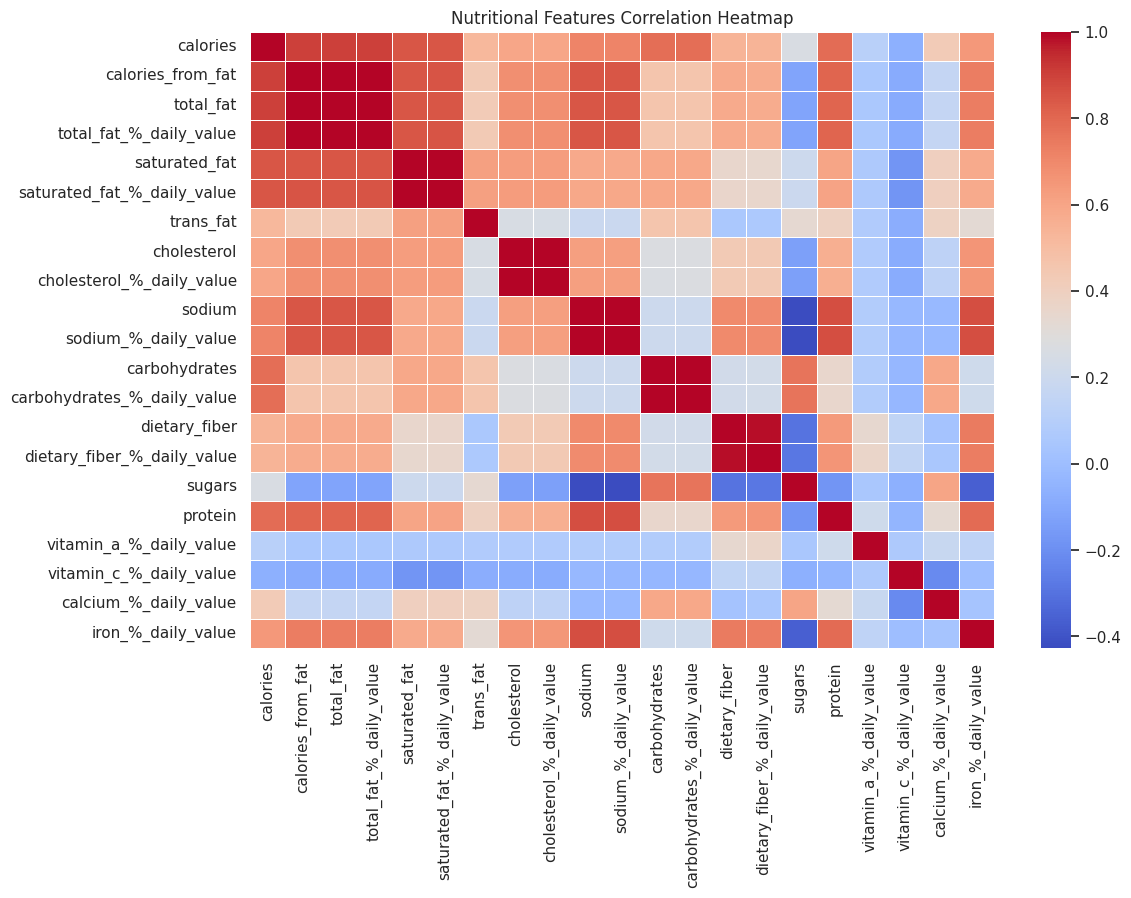

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only= True), cmap= 'coolwarm', linewidths=0.5)
plt.title('Nutritional Features Correlation Heatmap')
plt.show()

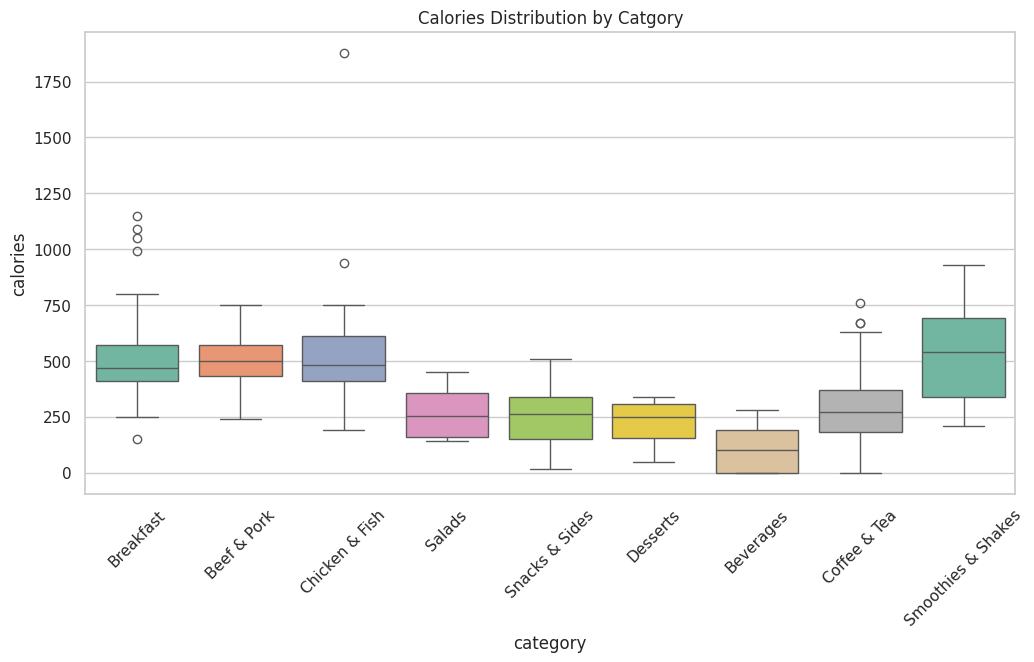

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='category', y='calories', palette='Set2')
plt.title('Calories Distribution by Catgory')
plt.xticks(rotation=45)
plt.show()

In [32]:
# A rough "health score" (lower is healthier here)
df['health_score'] = (df['calories'] + df['sodium'] + df['sugars']) / df['protein']

# Top 10 healthiest items
df.sort_values('health_score').head(10)[['item', 'calories', 'sodium', 'sugars', 'protein', 'health_score']]


,item,calories,sodium,sugars,protein,health_score
163,Nonfat Latte (Small),100,110,13,10,22.300000
165,Nonfat Latte (Large),170,180,21,16,23.187500
164,Nonfat Latte (Medium),130,135,16,12,23.416667
130,1% Low Fat Milk Jug,100,125,12,8,29.625000
177,Nonfat Latte with Sugar Free French Vanilla Sy...,220,240,21,16,30.062500
175,Nonfat Latte with Sugar Free French Vanilla Sy...,140,150,13,10,30.300000
176,Nonfat Latte with Sugar Free French Vanilla Sy...,170,180,16,12,30.500000
86,Premium Bacon Ranch Salad with Grilled Chicken,220,690,4,29,31.517241
131,Fat Free Chocolate Milk Jug,130,135,22,9,31.888889
100,Side Salad,20,10,2,1,32.000000


In [33]:
print("Insights:")
print("- The highest calorie items mostly come from 'Burgers' and 'Breakfast' categories.")
print("- Some beverages have very high sugar but low calories.")
print("- Sodium levels are dangerously high in many items (>2000mg).")

Insights:
- The highest calorie items mostly come from 'Burgers' and 'Breakfast' categories.
- Some beverages have very high sugar but low calories.
- Sodium levels are dangerously high in many items (>2000mg).


In [34]:
''' 🛠️ Recommendations:
- Introduce low-sodium options for health-conscious customers.
- Offer more high-protein, low-sugar beverages.
- Clearly mark high-calorie/high-fat items on the menu.
- Consider seasonal marketing for healthy meals like salads or grilled options.
'''

' 🛠️ Recommendations:\n- Introduce low-sodium options for health-conscious customers.\n- Offer more high-protein, low-sugar beverages.\n- Clearly mark high-calorie/high-fat items on the menu.\n- Consider seasonal marketing for healthy meals like salads or grilled options.\n'